# Evaluate the classDetect Method and produce ROC curves
purpose:  to rank models according to metrics

In [21]:
import os
from glob import glob
import json
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import pickle
import sys

In [7]:
pickleDir = './pickle'
assert os.path.exists(pickleDir), "Specified directory of pickle files does not exist!"

In [12]:
pickleFiles = glob(pickleDir + '/*.pickle')
len(pickleFiles)

25

In [183]:
cl_sel = {d:i for i,d in enumerate(sorted(os.listdir('../fdata_CropSQRS/test/upper')))}
sel_cl = [i for i in sorted(cl_sel.keys())]
cl_color = dict(zip(cl_sel.keys(),['blue', 'green', 'red', 'cyan', 'maroon', 'yellow', 'orange', 'violet','pink']))

In [161]:
cl_color

{'Blazer': 'b',
 'Blouse': 'g',
 'Cardigan': 'r',
 'Hoodie': 'c',
 'Jacket': 'm',
 'Sweater': 'y',
 'Tank': 'k',
 'Tee': 'w',
 'Top': 'b'}

In [171]:
allResults = {}
for f in pickleFiles:
    with open(f,'rb') as fp:
        y_true,y_test = pickle.load(fp)
    allResults[f] = [y_true,y_test]

In [180]:
f1 = pickleFiles[0]
f2 = pickleFiles[1]
f3 = pickleFiles[3]

In [32]:
k,res = list(allResults.items())[0]

In [133]:
allROC = {}
for f,res in allResults.items():
    # Compute ROC curve and ROC area for each class
    y_true,y_test = res
    assert y_true.shape == y_test.shape, f"Incompatible size for y_true,y_pred of f={f}"
    n_classes = y_true.shape[1]
    fpr = {}
    tpr = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_test[:, i])
        assert fpr[i].shape == tpr[i].shape, f"Incompatible size for fpr and tpr f={f}, i={i}"
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_test.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    allROC[f] = [fpr,tpr,roc_auc]
    

In [168]:
#for f,things in allROC.items():
#    fpr,tpr,roc_auc = things
#    for k in fpr.keys():
#        print(f'for f[k]={f}[{k}], fpr.shape={fpr[k].shape}, tpr.shape={tpr[k].shape}')

In [139]:
fpr,tpr,roc_auc = allROC[f]

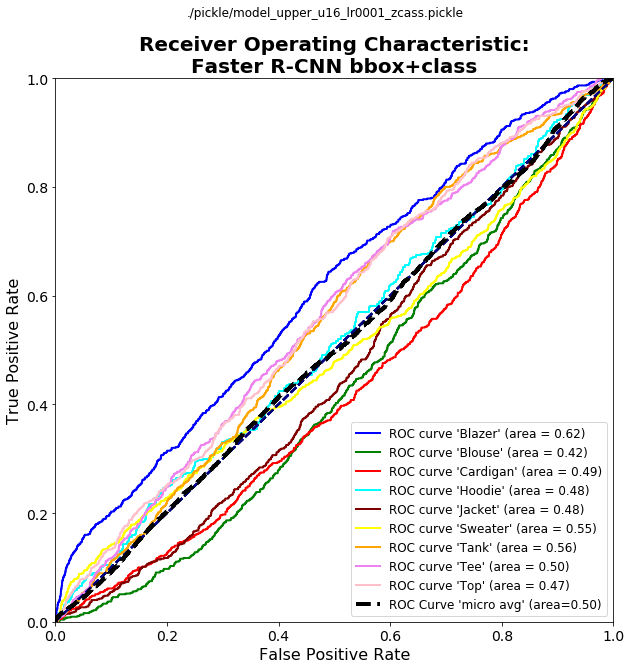

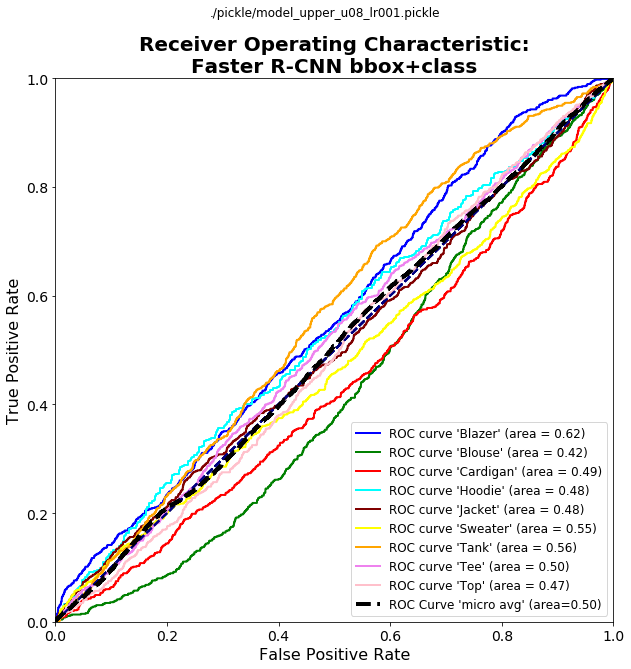

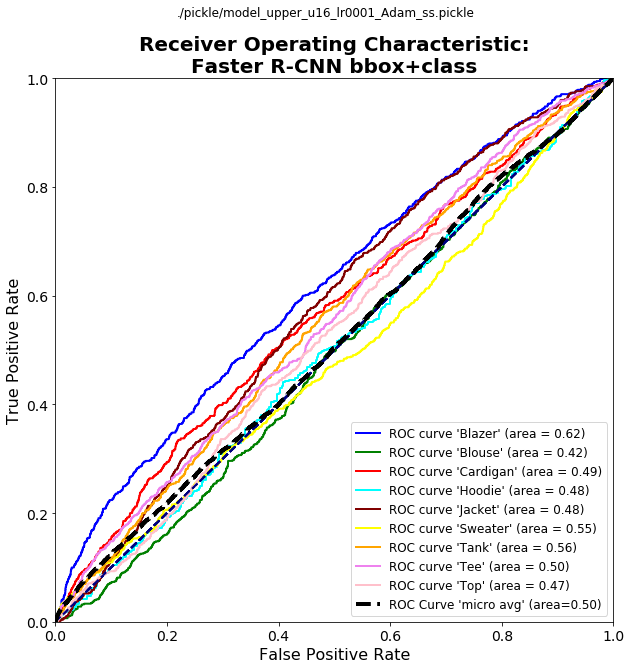

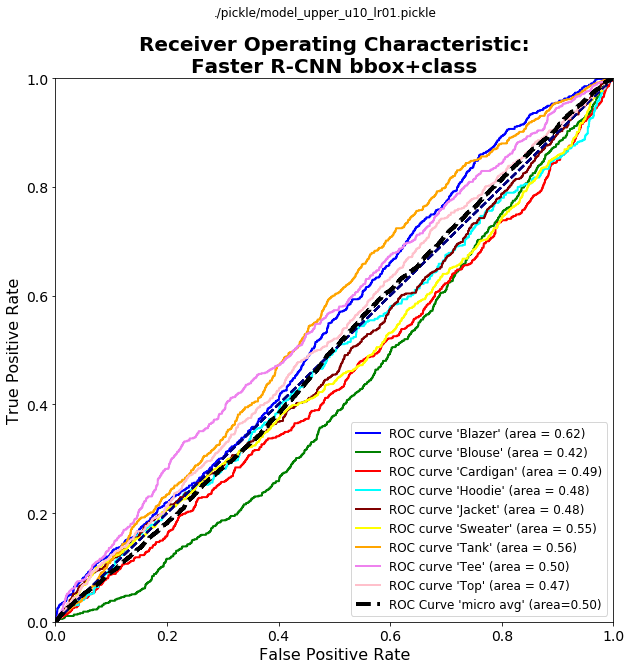

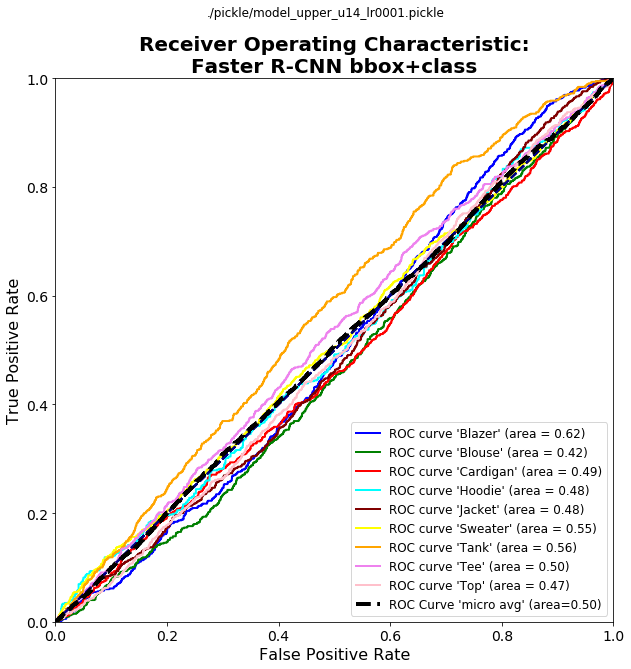

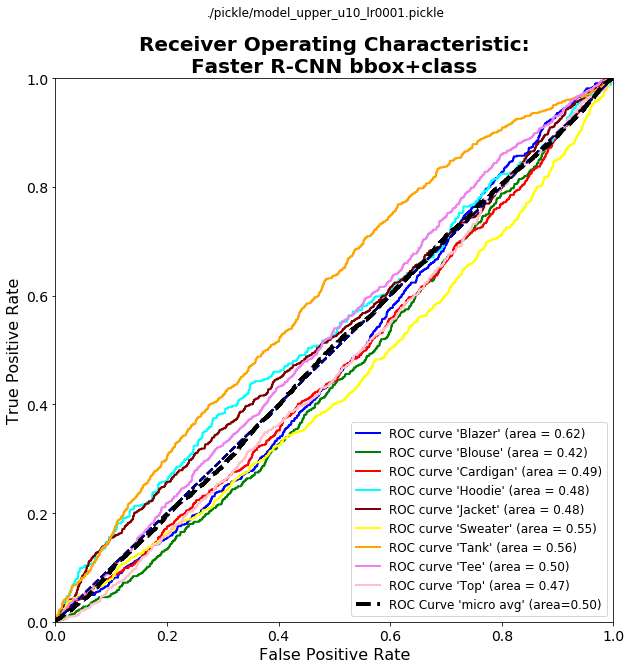

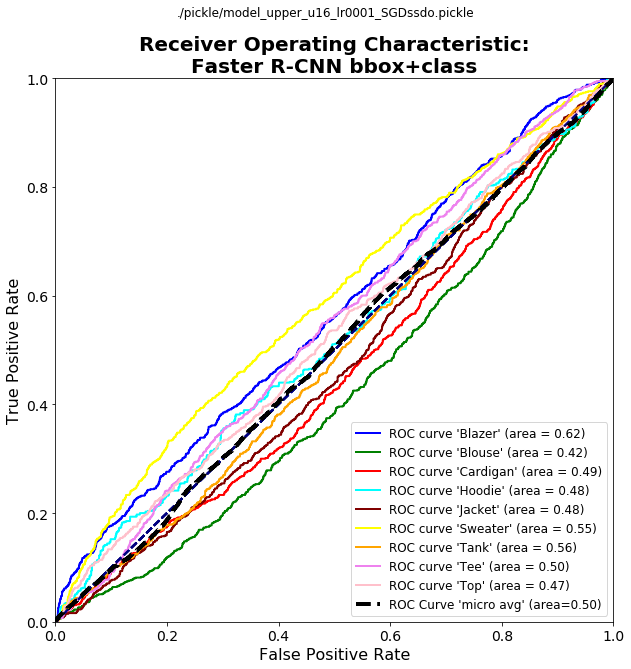

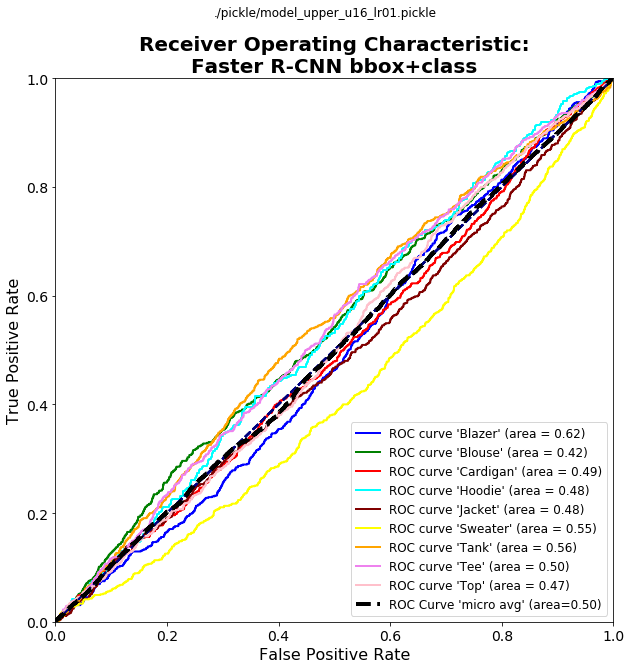

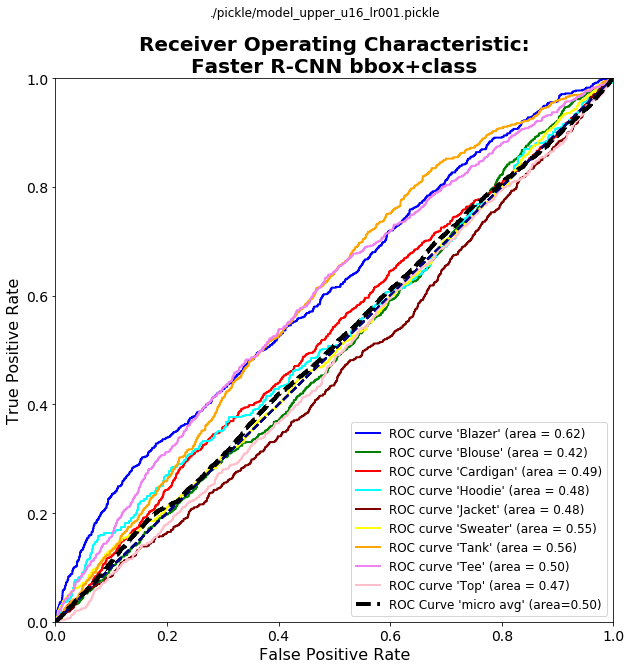

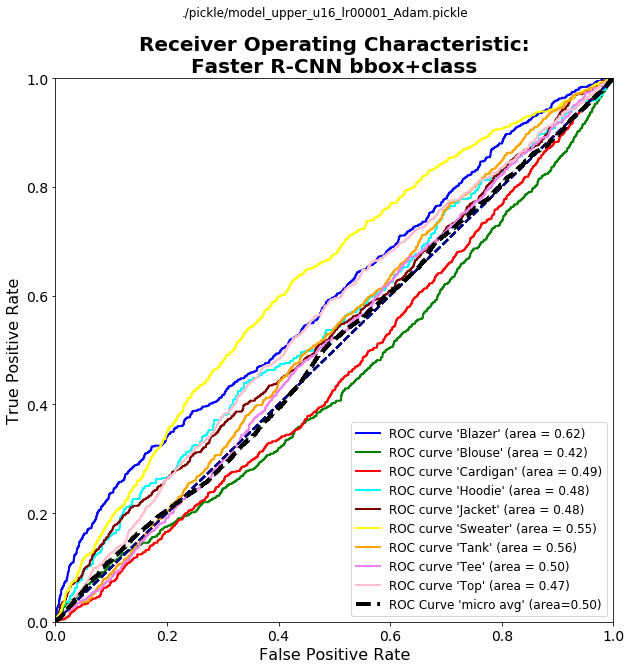

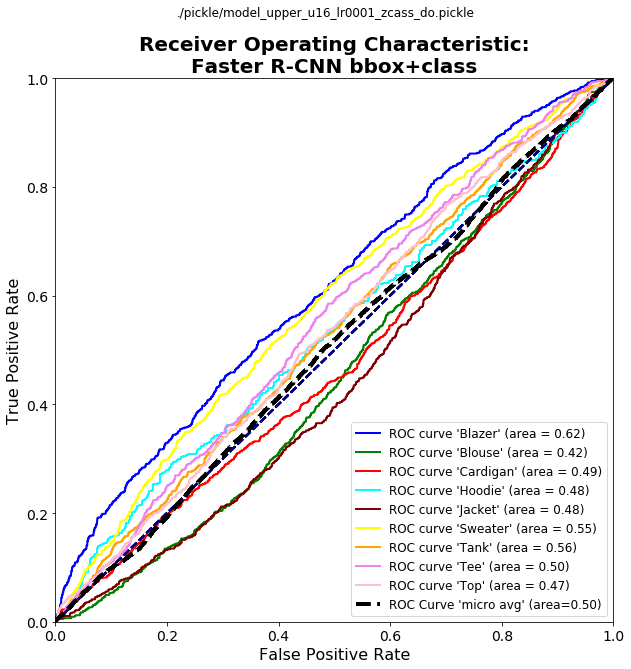

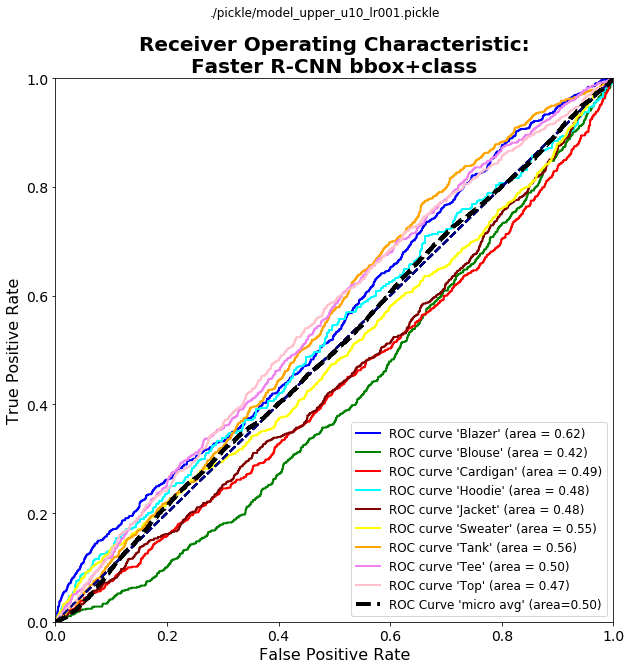

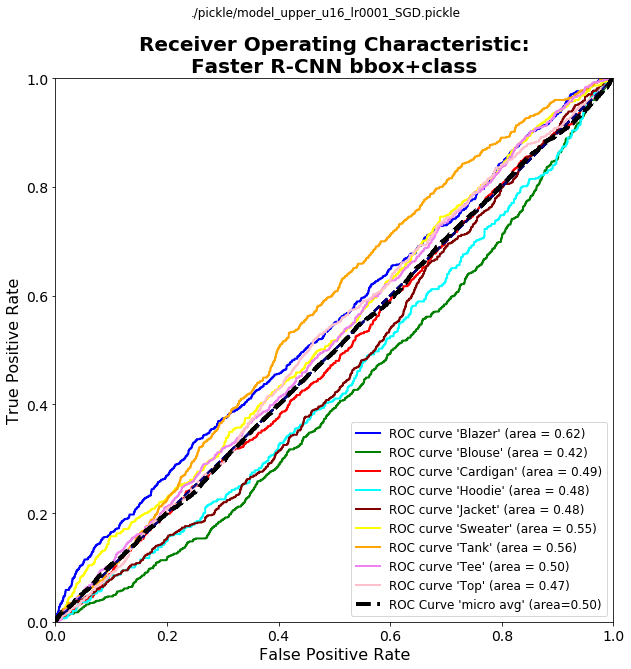

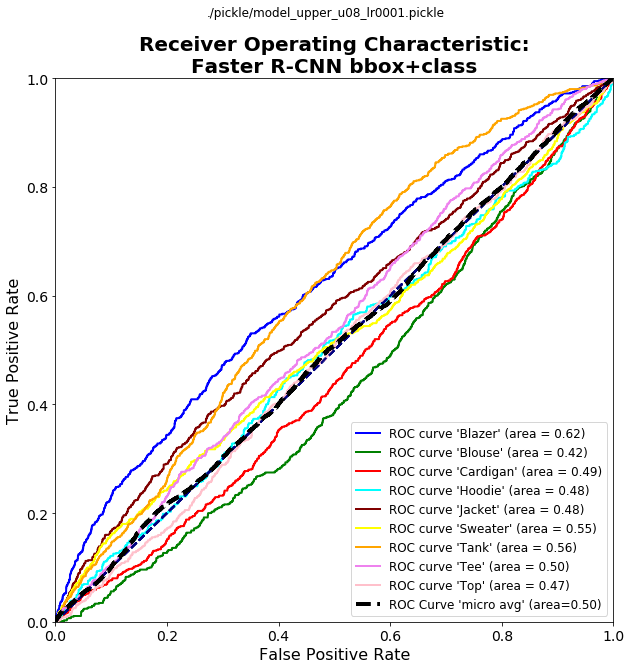

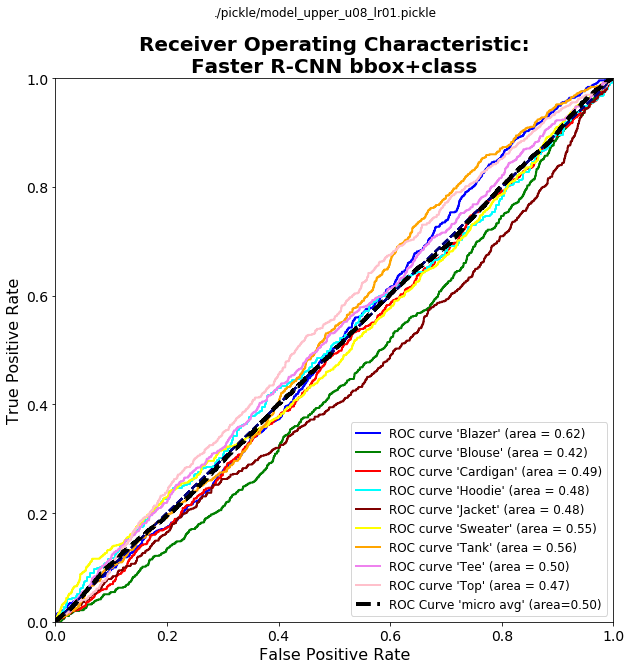

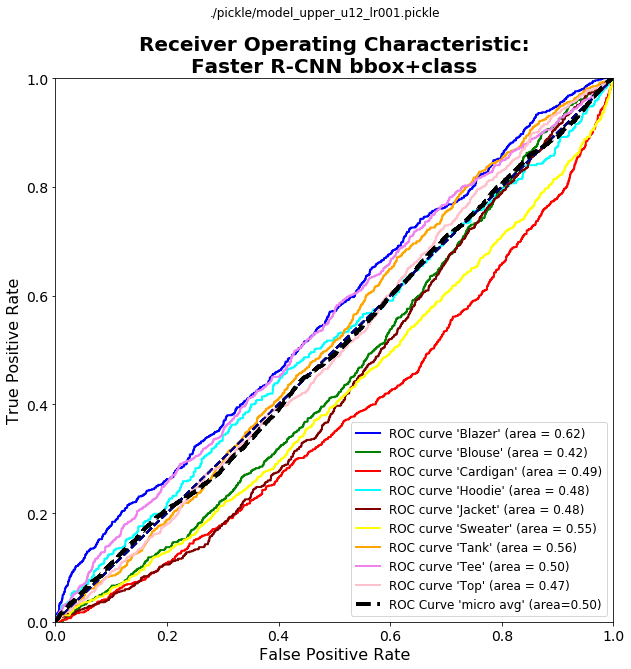

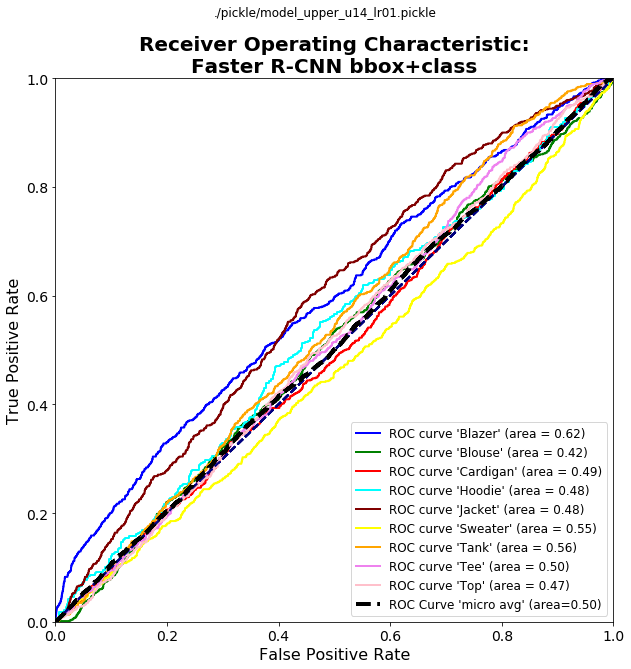

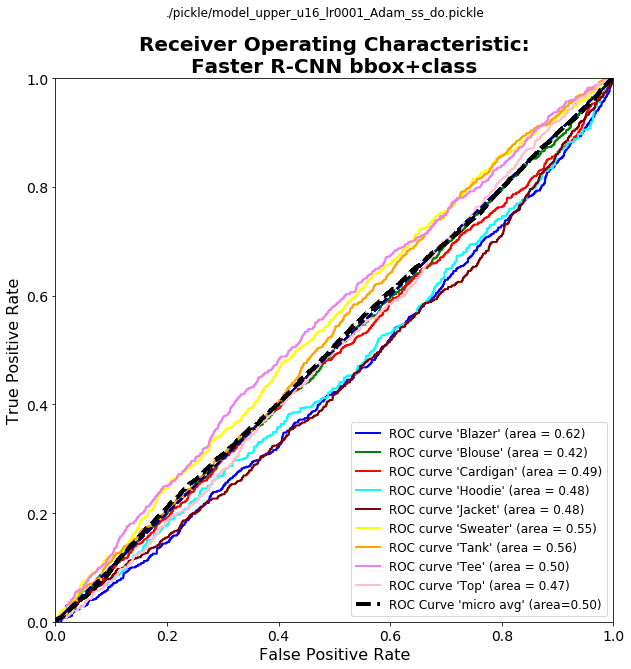

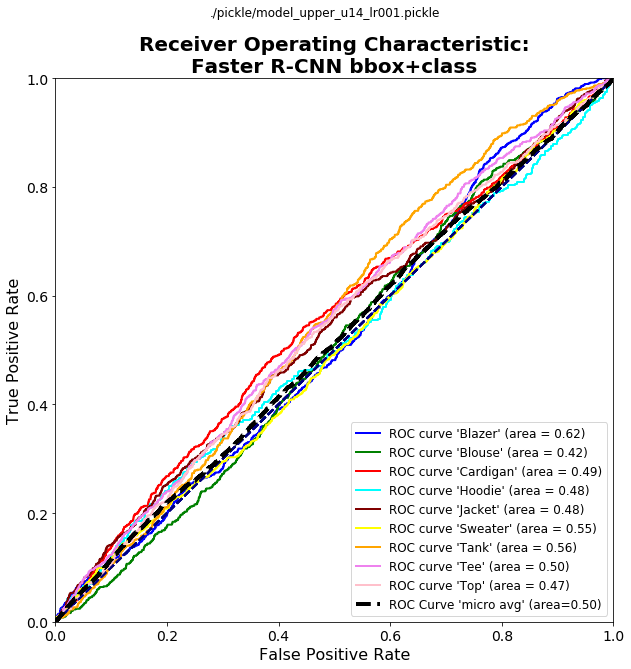

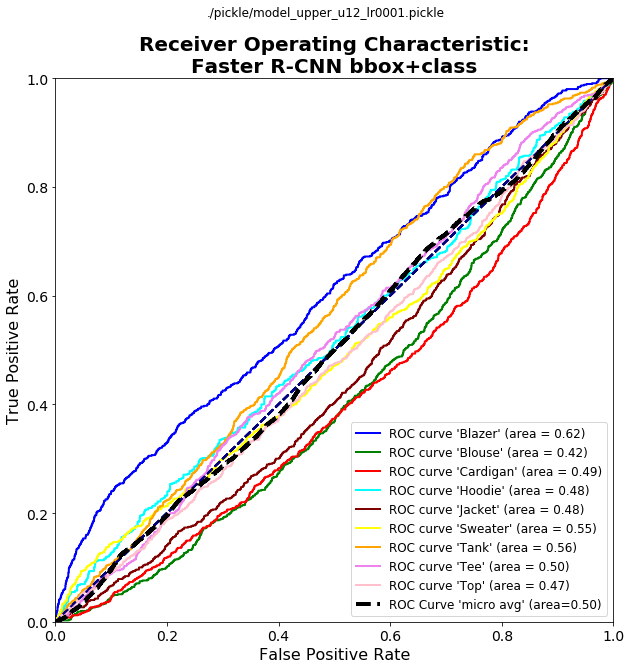

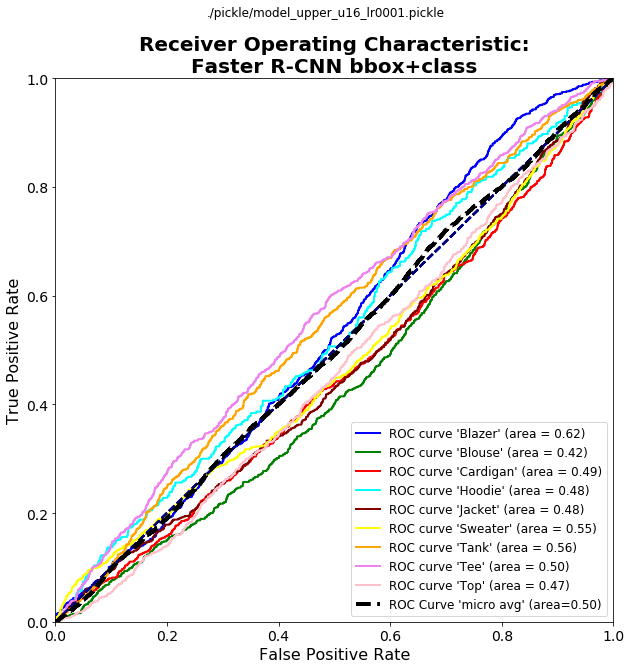

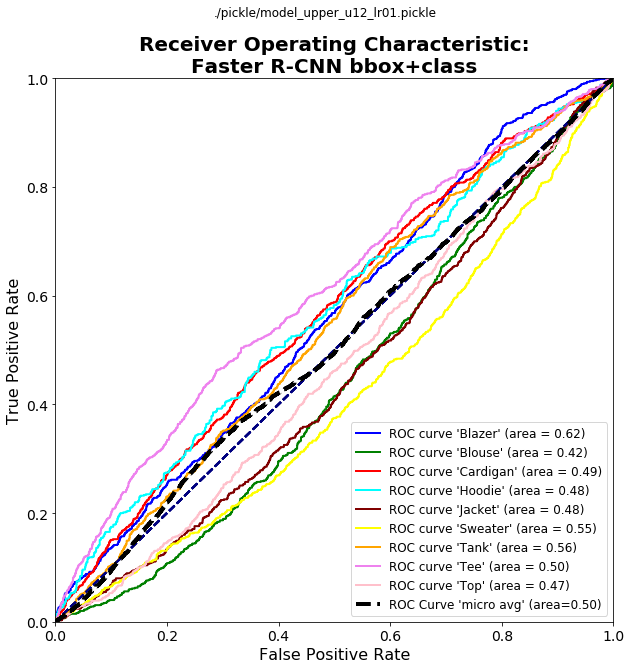

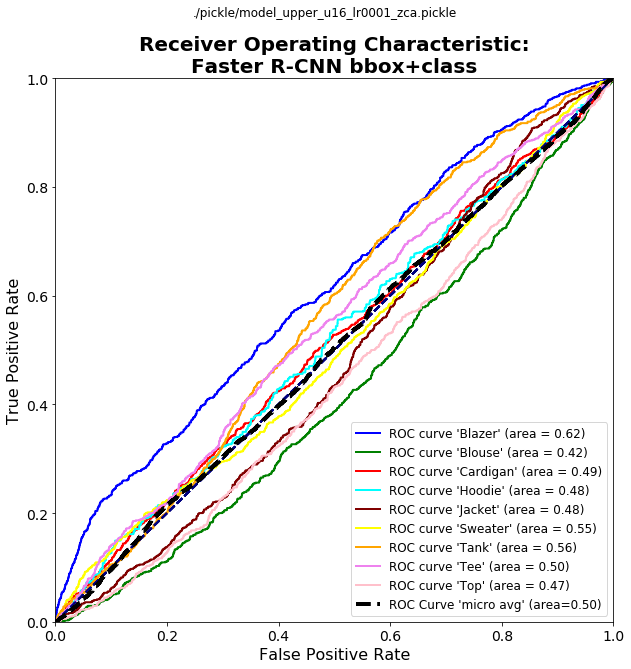

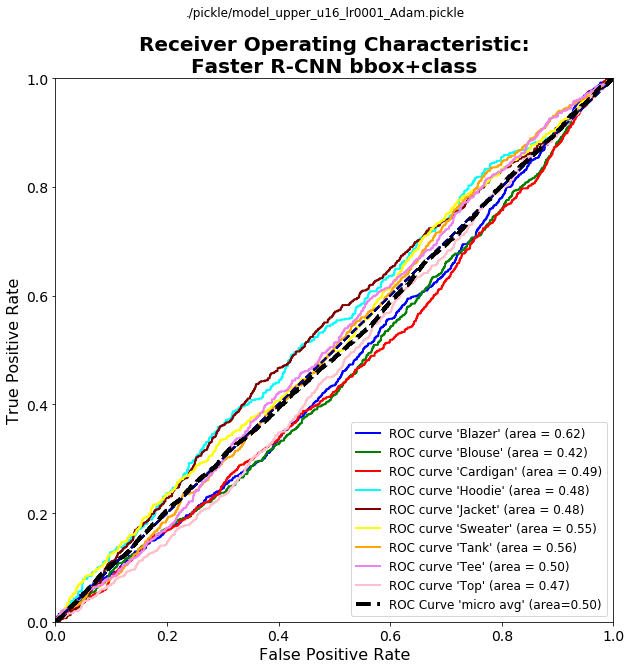

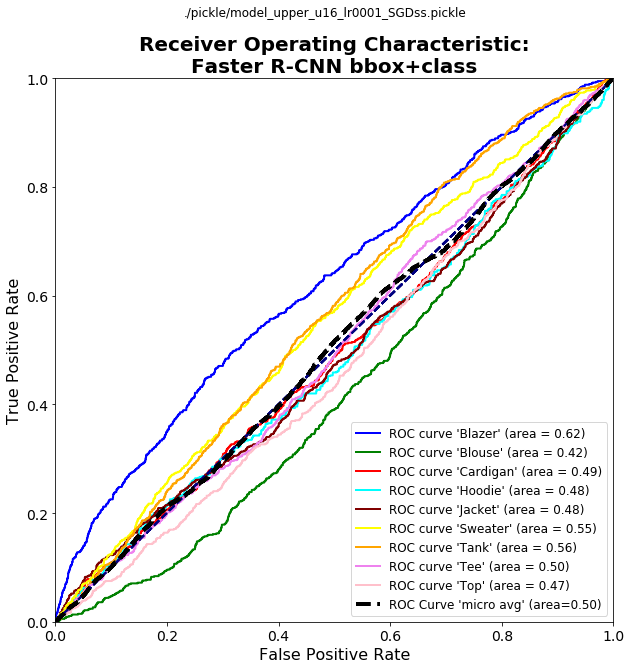

In [184]:
for f,res in allROC.items():
    fpr,tpr,roc_auc = res
    fig = plt.figure(figsize=(10,10))
    for i in range(n_classes):    
        cl_name = sel_cl[i]
        plt.plot(fpr[i], tpr[i], color=cl_color[cl_name],
                 lw=lw, label=f'ROC curve \'{cl_name}\' (area = {roc_auc[i]:0.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])

    plt.plot(fpr['micro'],tpr['micro'],color='black',
             lw=4,label=f'ROC Curve \'micro avg\' (area={roc_auc["micro"]:0.2f})',
             linestyle='--')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver Operating Characteristic:\nFaster R-CNN bbox+class',fontsize=20,fontweight='bold')
    plt.suptitle(f,fontsize=12)
    plt.legend(loc="lower right",fontsize=12)
    plt.show()

In [152]:
cl_color

{'Blazer': 'b',
 'Blouse': 'g',
 'Cardigan': 'r',
 'Hoodie': 'c',
 'Jacket': 'm',
 'Sweater': 'y',
 'Tank': 'k',
 'Tee': 'w'}

In [153]:
cl_sel.keys()

dict_keys(['Blazer', 'Blouse', 'Cardigan', 'Hoodie', 'Jacket', 'Sweater', 'Tank', 'Tee', 'Top'])

{0: 0.6180614182021218,
 1: 0.42176594081518703,
 2: 0.4914416527079844,
 3: 0.48336314907872696,
 4: 0.48453735343383586,
 5: 0.5503785594639866,
 6: 0.5609566722501396,
 7: 0.4990103852596315,
 8: 0.46757164351851854,
 'micro': 0.5017406022467581}

In [170]:
for f,res in allROC.items():
    fpr,tpr,roc_auc = res
    print(f"for f={f}, roc_auc={roc_auc['micro']}")

for f=./pickle/model_upper_u16_lr0001_zcass.pickle, roc_auc=0.5017406022467581
for f=./pickle/model_upper_u08_lr001.pickle, roc_auc=0.5017406022467581
for f=./pickle/model_upper_u16_lr0001_Adam_ss.pickle, roc_auc=0.5017406022467581
for f=./pickle/model_upper_u10_lr01.pickle, roc_auc=0.5017406022467581
for f=./pickle/model_upper_u14_lr0001.pickle, roc_auc=0.5017406022467581
for f=./pickle/model_upper_u10_lr0001.pickle, roc_auc=0.5017406022467581
for f=./pickle/model_upper_u16_lr0001_SGDssdo.pickle, roc_auc=0.5017406022467581
for f=./pickle/model_upper_u16_lr01.pickle, roc_auc=0.5017406022467581
for f=./pickle/model_upper_u16_lr001.pickle, roc_auc=0.5017406022467581
for f=./pickle/model_upper_u16_lr00001_Adam.pickle, roc_auc=0.5017406022467581
for f=./pickle/model_upper_u16_lr0001_zcass_do.pickle, roc_auc=0.5017406022467581
for f=./pickle/model_upper_u10_lr001.pickle, roc_auc=0.5017406022467581
for f=./pickle/model_upper_u16_lr0001_SGD.pickle, roc_auc=0.5017406022467581
for f=./pickle/mo